In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline



In [46]:
!pip install lightgbm xgboost catboost



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
dataset = pd.read_csv(r"C:\Users\dimri\Downloads\Micro-credit-Data-file.csv")

In [48]:
dataset.shape

(209593, 37)

In [49]:
dataset.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [50]:
dataset.head(3)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-08-19


In [51]:
dataset.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [52]:
dataset = dataset.drop(columns=['Unnamed: 0','msisdn','pcircle'])

### EDA

In [53]:
dataset['label'].value_counts()

label
1    183431
0     26162
Name: count, dtype: int64

## Bar plot

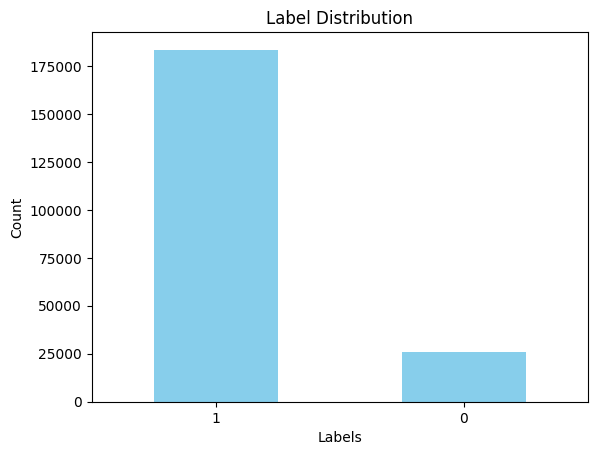

In [54]:
dataset['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


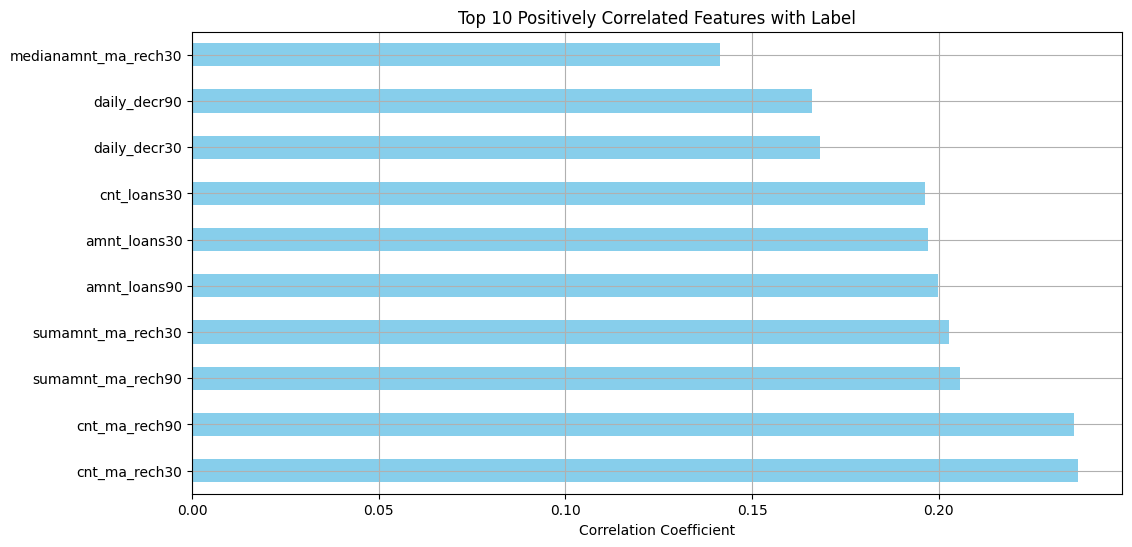

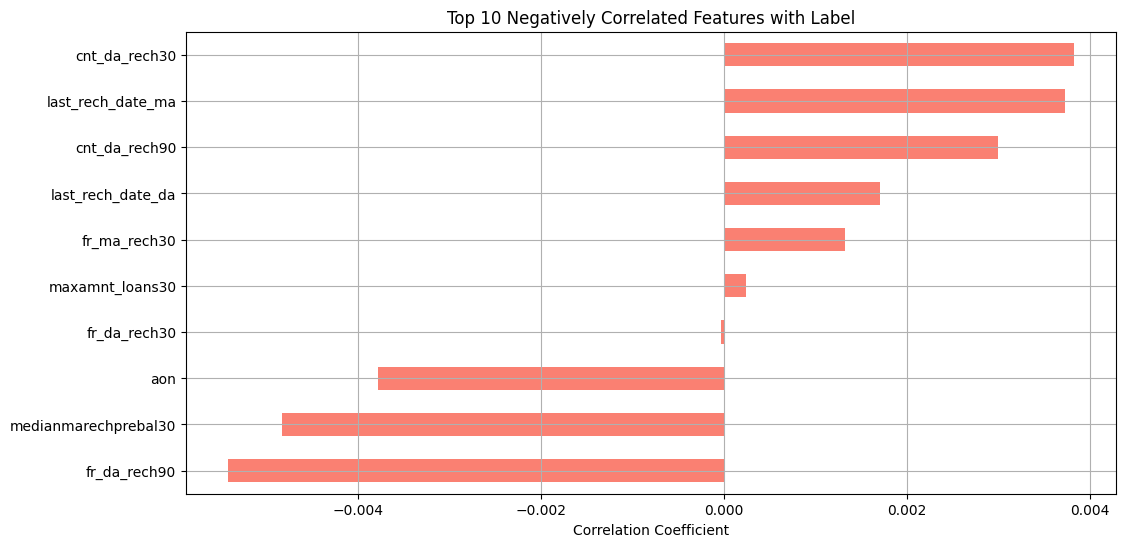

In [55]:
correlation_matrix = dataset.corr(numeric_only=True)
target_corr = correlation_matrix['label'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
target_corr.drop('label').sort_values(ascending=False).head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Positively Correlated Features with Label')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
target_corr.drop('label').sort_values().head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Negatively Correlated Features with Label')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.show()


In [56]:
dataset = dataset.drop(columns='pdate') 

In [57]:
dataset.duplicated().sum()

386

###  Feature Engineering

In [58]:
print(dataset.columns.tolist())


['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']


In [59]:
dataset['avg_loan_amount_30'] = dataset['amnt_loans30'] / (dataset['cnt_loans30'] + 1)

dataset['call_success_ratio'] = dataset['fr_ma_rech30'] / (dataset['cnt_ma_rech30'] + 1)

dataset['rech_amt_per_count_ma_30'] = dataset['sumamnt_ma_rech30'] / (dataset['cnt_ma_rech30'] + 1)

dataset['total_rech_count_30'] = dataset['cnt_ma_rech30'] + dataset['cnt_da_rech30']

dataset['loan_to_total_rech_ratio'] = dataset['amnt_loans30'] / (dataset['sumamnt_ma_rech30'] + 1)

if 'daily_to_rental_ratio' not in dataset.columns:
    dataset['daily_to_rental_ratio'] = dataset['daily_decr30'] / (dataset['rental30'] + 1)


In [60]:
print(dataset[['avg_loan_amount_30', 'call_success_ratio', 'rech_amt_per_count_ma_30', 
               'total_rech_count_30', 'loan_to_total_rech_ratio', 'daily_to_rental_ratio']].head())


   avg_loan_amount_30  call_success_ratio  rech_amt_per_count_ma_30  \
0                4.00                7.00                  1026.000   
1                6.00                0.00                  2893.500   
2                3.00                0.00                   769.500   
3                4.00                0.00                     0.000   
4                5.25                0.25                  2503.625   

   total_rech_count_30  loan_to_total_rech_ratio  daily_to_rental_ratio  
0                  2.0                  0.003897              13.815629  
1                  1.0                  0.002073               3.283084  
2                  1.0                  0.003896               1.551385  
3                  0.0                 12.000000               0.132328  
4                  7.0                  0.002097               0.136939  


In [63]:
import numpy as np

# Replace inf and -inf with NaN
X_10.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now apply imputer safely
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_10_imputed = imputer.fit_transform(X_10)

# Save the imputer for Streamlit app use
import pickle
with open('imputer_10features.pkl', 'wb') as f:
    pickle.dump(imputer, f)



In [65]:
import numpy as np

X_train[X_train == np.inf] = np.nan
X_train[X_train == -np.inf] = np.nan

X_test[X_test == np.inf] = np.nan
X_test[X_test == -np.inf] = np.nan



In [66]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)  
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8718957990410077

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.12      0.00      0.01      5232
           1       0.88      1.00      0.93     36687

    accuracy                           0.87     41919
   macro avg       0.50      0.50      0.47     41919
weighted avg       0.78      0.87      0.82     41919



In [68]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.90739282902741

Random Forest Report:
               precision    recall  f1-score   support

           0       0.71      0.44      0.54      5232
           1       0.92      0.97      0.95     36687

    accuracy                           0.91     41919
   macro avg       0.82      0.70      0.74     41919
weighted avg       0.90      0.91      0.90     41919



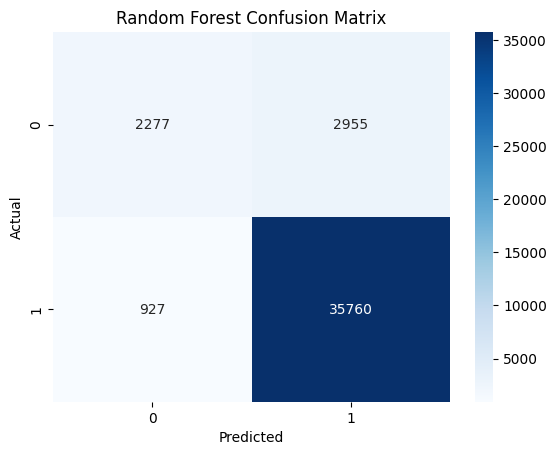

In [69]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


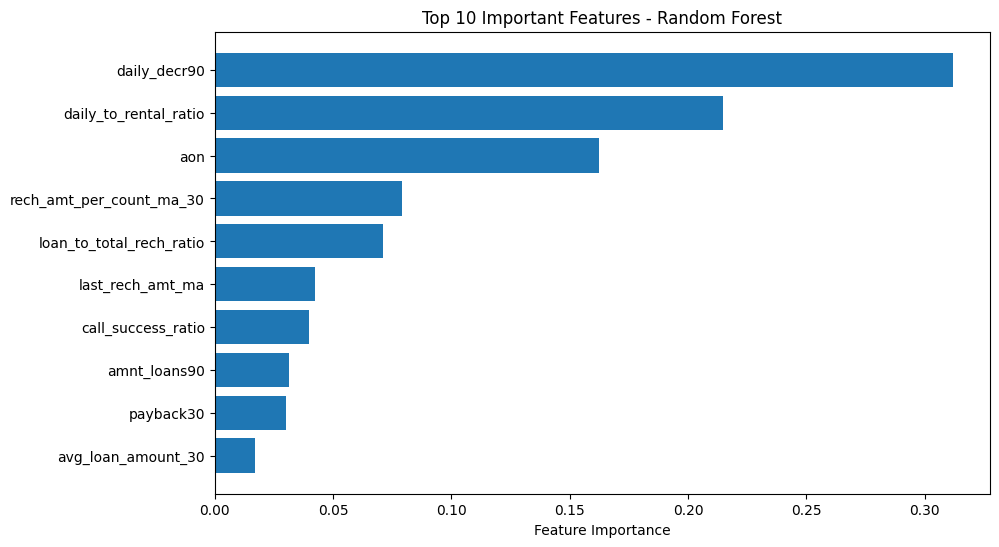

In [70]:
feature_importance = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features - Random Forest")
plt.show()

In [71]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [72]:
new_data = X_test[0:1]  
prediction = rf.predict(new_data)
print("Prediction for new input:", prediction)


Prediction for new input: [1]


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


In [74]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=5000)),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("SVC", SVC()),
   
]


In [76]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier


In [77]:
RandomForestClassifier(n_jobs=-1)
ExtraTreesClassifier(n_jobs=-1)
BaggingClassifier(n_jobs=-1)


BaggingClassifier(n_jobs=-1)

In [78]:
("Random Forest", RandomForestClassifier(n_jobs=-1)),
("Extra Trees", ExtraTreesClassifier(n_jobs=-1)),
("Bagging", BaggingClassifier(n_jobs=-1)),
("Gradient Boosting", GradientBoostingClassifier())


('Gradient Boosting', GradientBoostingClassifier())

In [79]:
models = [
    ("Random Forest", RandomForestClassifier(n_jobs=-1)),
    ("Extra Trees", ExtraTreesClassifier(n_jobs=-1)),
    ("Bagging", BaggingClassifier(n_jobs=-1)),
    ("Gradient Boosting", GradientBoostingClassifier())
]


In [80]:
results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)
print(results_df)


               Model  Accuracy  F1 Score    Recall  Precision
3  Gradient Boosting  0.908920  0.949903  0.986644   0.915800
0      Random Forest  0.907154  0.948418  0.975277   0.922998
1        Extra Trees  0.901095  0.945016  0.971161   0.920242
2            Bagging  0.898662  0.943029  0.958323   0.928215


### we can see recall of randomForest is best 

In [81]:
best_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.43      0.54      5232
           1       0.92      0.98      0.95     36687

    accuracy                           0.91     41919
   macro avg       0.82      0.70      0.74     41919
weighted avg       0.90      0.91      0.90     41919



## Save it 

In [82]:
import pickle
pickle.dump(model, open("rf_model_10features.pkl", "wb"))
pickle.dump(selected_features, open("selected_features.pkl", "wb"))



In [84]:
import streamlit as st
import pandas as pd
import pickle

# Load model and imputer
model = pickle.load(open("rf_model_10features.pkl", "rb"))
imputer = pickle.load(open("imputer_10features.pkl", "rb"))

st.title("Loan Default Prediction App")

# Take input from user for each feature
value1 = st.number_input('aon')
value2 = st.number_input('daily_decr90')
value3 = st.number_input('payback30')
value4 = st.number_input('amnt_loans90')
value5 = st.number_input('last_rech_amt_ma')
value6 = st.number_input('avg_loan_amount_30')
value7 = st.number_input('call_success_ratio')
value8 = st.number_input('rech_amt_per_count_ma_30')
value9 = st.number_input('loan_to_total_rech_ratio')
value10 = st.number_input('daily_to_rental_ratio')

# Create the input DataFrame
input_dict = {
    'aon': value1,
    'daily_decr90': value2,
    'payback30': value3,
    'amnt_loans90': value4,
    'last_rech_amt_ma': value5,
    'avg_loan_amount_30': value6,
    'call_success_ratio': value7,
    'rech_amt_per_count_ma_30': value8,
    'loan_to_total_rech_ratio': value9,
    'daily_to_rental_ratio': value10
}
input_df = pd.DataFrame([input_dict])

# Handle missing or infinite values
import numpy as np
input_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values
input_imputed = imputer.transform(input_df)

# Predict
if st.button("Predict"):
    prediction = model.predict(input_imputed)
    if prediction[0] == 1:
        st.error("Loan is likely to default ❌")
    else:
        st.success("Loan is likely to be repaid ✅")


2025-07-23 14:47:20.467 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 14:47:21.153 
  command:

    streamlit run C:\Users\dimri\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-23 14:47:21.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 14:47:21.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 14:47:21.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 14:47:21.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 14:47:21.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 14:47:

In [85]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
